In [403]:
import pandas as pd
import numpy as np

In [404]:
data = '../data/iris.csv'
irisDF = pd.read_csv(data)

In [423]:
featureDF = irisDF[irisDF.columns[2:4]][:100]
featureDF

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1


In [424]:
targerSR = irisDF.species[:100]
targerSR

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: species, Length: 100, dtype: object

In [425]:
featureDF.shape, targerSR.shape

((100, 2), (100,))

In [426]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targerSR,
                                                    stratify=targerSR,
                                                    random_state=7)
X_train

,petal_length,petal_width
59,3.9,1.4
9,1.5,0.1
69,3.9,1.1
6,1.4,0.3
97,4.3,1.3
...,...,...
18,1.7,0.3
93,3.3,1.0
92,4.0,1.2
56,4.7,1.6


In [427]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(x_test)

In [428]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error
# 
# 
# model = SVC()
# 
# model.fit(scaled_X_train, y_train)
# train_score = model.score(X_train, y_train)
# test_score = model.score(x_test, y_test)
# print(f'Train_score : {train_score}, Test_score : {test_score}')
# 
# # train_scores, test_scores = [], []
# # 
# # train_scores.append(train_score)
# # test_scores.append(test_score)
# print(f'scaler : {scaler}\nTrain score : {train_score}\nTest score : {test_score}')
# 
# y_pre = model.predict(scaled_X_train)
# r2 = r2_score(y_test, y_pre)
# mse = mean_squared_error(y_test, y_pre)
# mae = mean_absolute_error(y_test, y_pre)
# rmse = mean_squared_error(y_test, y_pre, squared=False)
# accuracyScore = accuracy_score(y_test, y_pre)
# precisionScore = precision_score(y_test, y_pre)
# recallScore = recall_score(y_test, y_pre)
# f1Score = f1_score(y_test, y_pre)
# 
# print(f'''
# [모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\n\n--------------------------------------
# ''')


In [429]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targerSR, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=targerSR)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# kernelList = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernelList = ['linear']
# accuracyList = []

for k in kernelList:
    for c in range(1,50,5):
        model = SVC(kernel=k, C=c)
        model.fit(X_train_scaled, y_train)
        # print(f'classes_ : {model.classes_}')
        # print(f'{model._get_param_names()}')
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
        
        print(f'Train score : {train_score:.3f}, Test score : {test_score:.3f} ',end='')
        
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        # accuracyList.append(accuracy)
        
        # 결과 출력
        print(f"Kernel : {k:8} C : {c:<3} Accuracy: {accuracy:.4f}")
        print(f'model.coef_ : {model.coef_}, model.intercept_ : {model.intercept_}')
# accuracyList

Train score : 1.000, Test score : 1.000 Kernel : linear   C : 1   Accuracy: 1.0000
model.coef_ : [[0.98018495 0.90340728]], model.intercept_ : [0.2701354]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 6   Accuracy: 1.0000
model.coef_ : [[1.10324831 1.01683111]], model.intercept_ : [0.33743526]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 11  Accuracy: 1.0000
model.coef_ : [[1.10324831 1.01683111]], model.intercept_ : [0.33743526]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 16  Accuracy: 1.0000
model.coef_ : [[1.10324831 1.01683111]], model.intercept_ : [0.33743526]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 21  Accuracy: 1.0000
model.coef_ : [[1.10324831 1.01683111]], model.intercept_ : [0.33743526]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 26  Accuracy: 1.0000
model.coef_ : [[1.10324831 1.01683111]], model.intercept_ : [0.33743526]
Train score : 1.000, Test score : 1.000 Kernel : linear   C : 31 

In [430]:
X_test

,petal_length,petal_width
85,4.5,1.6
63,4.7,1.4
56,4.7,1.6
35,1.2,0.2
53,4.0,1.3
84,4.5,1.5
41,1.3,0.3
66,4.5,1.5
69,3.9,1.1
51,4.5,1.5


In [431]:
model.coef_

array([[1.10324831, 1.01683111]])

In [432]:
X_train_scaled

array([[ 0.91670631,  1.29127014],
       [ 0.77667989,  0.92990723],
       [-0.97365039, -0.69622588],
       [ 1.05673273,  1.11058869],
       [ 0.8466931 ,  0.92990723],
       [-1.0436636 , -1.05758879],
       [ 1.19675915,  0.92990723],
       [-1.0436636 , -1.05758879],
       [-0.97365039, -1.23827025],
       [ 1.05673273,  1.11058869],
       [ 0.98671952,  0.92990723],
       [-0.97365039, -1.05758879],
       [ 0.77667989,  0.74922577],
       [ 1.33678558,  1.83331452],
       [ 0.63665347,  0.56854432],
       [-1.11367681, -1.05758879],
       [ 0.70666668,  1.11058869],
       [-0.97365039, -0.69622588],
       [-0.69359754, -0.69622588],
       [-0.90363718, -1.05758879],
       [-1.11367681, -0.87690734],
       [ 0.77667989,  0.38786286],
       [-0.97365039, -0.87690734],
       [ 1.19675915,  1.11058869],
       [-1.0436636 , -0.87690734],
       [ 0.77667989,  0.92990723],
       [-1.25370323, -1.23827025],
       [ 1.05673273,  0.74922577],
       [ 0.42661383,

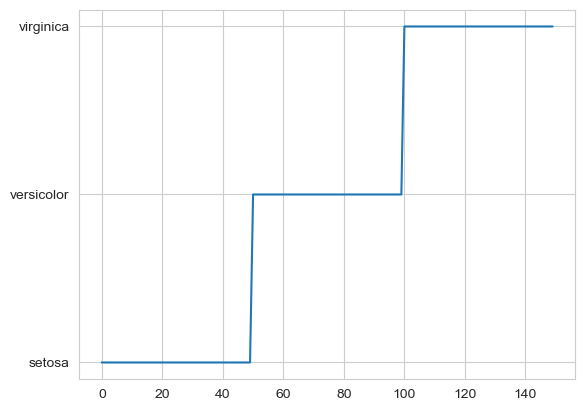

In [433]:
import matplotlib.pyplot as plt
# 
# for i in range(3):
#     plt.subplot(1,3, i+1)
#     plt.scatter(X_train[X_train.columns[0]], X_train[X_train.columns[i+1]])
# 
# for i in range(3):
#     plt.subplot(1,3, i+1)
#     plt.scatter(x_test[x_test.columns[0]], x_test[x_test.columns[i+1]])
#     
plt.plot(irisDF.species)

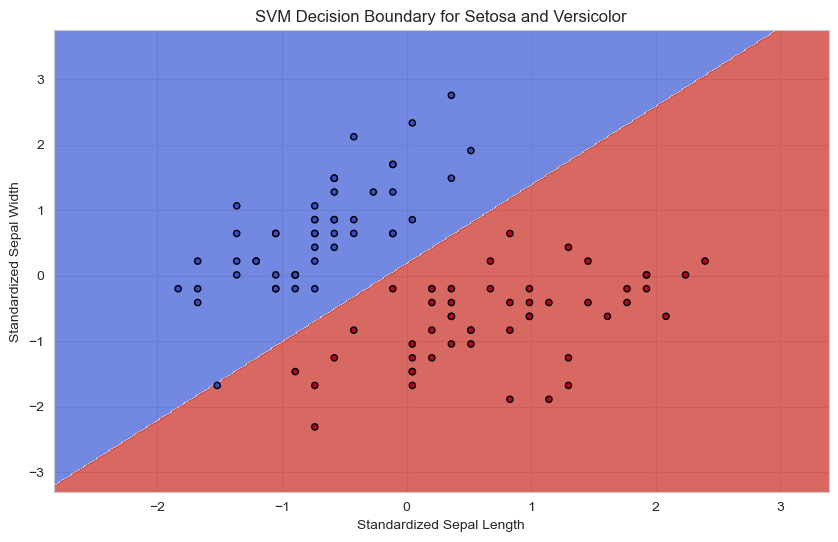

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Iris dataset
file_path = '../data/iris.csv'
iris_df = pd.read_csv(file_path)

# Filter the dataset for 'setosa' and 'versicolor' species
filtered_iris_df = iris_df[(iris_df['species'] == 'setosa') | (iris_df['species'] == 'versicolor')]

from itertools import combinations

iris_df.columns

# Select features and labels
X = filtered_iris_df[['sepal_length', 'sepal_width']].values
y = filtered_iris_df['species'].values

# Convert the species labels to numeric values
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Train SVM model with numeric labels
svm_model = SVC(kernel='linear').fit(X_standardized, y_numeric)

# Generate grid for plotting
h = .02  # step size in the mesh
x_min, x_max = X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1
y_min, y_max = X_standardized[:, 1].min() - 1, X_standardized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point in mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y_numeric, s=20, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title('SVM Decision Boundary for Setosa and Versicolor')
plt.show()


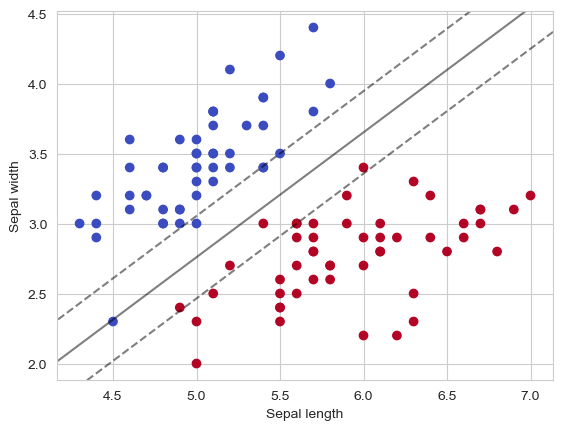

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Iris 데이터셋 로드 및 필터링
iris = datasets.load_iris()
X = iris.data[:100, :2]  # 처음 100개 샘플의 sepal length와 sepal width만 사용
y = iris.target[:100]

# SVM 모델 훈련
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
svm_model.fit(X, y)

# 결정 경계 및 마진 그리기
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 결정 경계를 그리기 위한 그리드 생성
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 결정 경계와 마진 그리기
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # 서포트 벡터 표시
    ax.scatter(model['svc'].support_vectors_[:, 0], 
               model['svc'].support_vectors_[:, 1], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# 데이터와 결정 경계 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plot_svc_decision_function(svm_model)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
combinations(iris_df.columns[:4], 2)

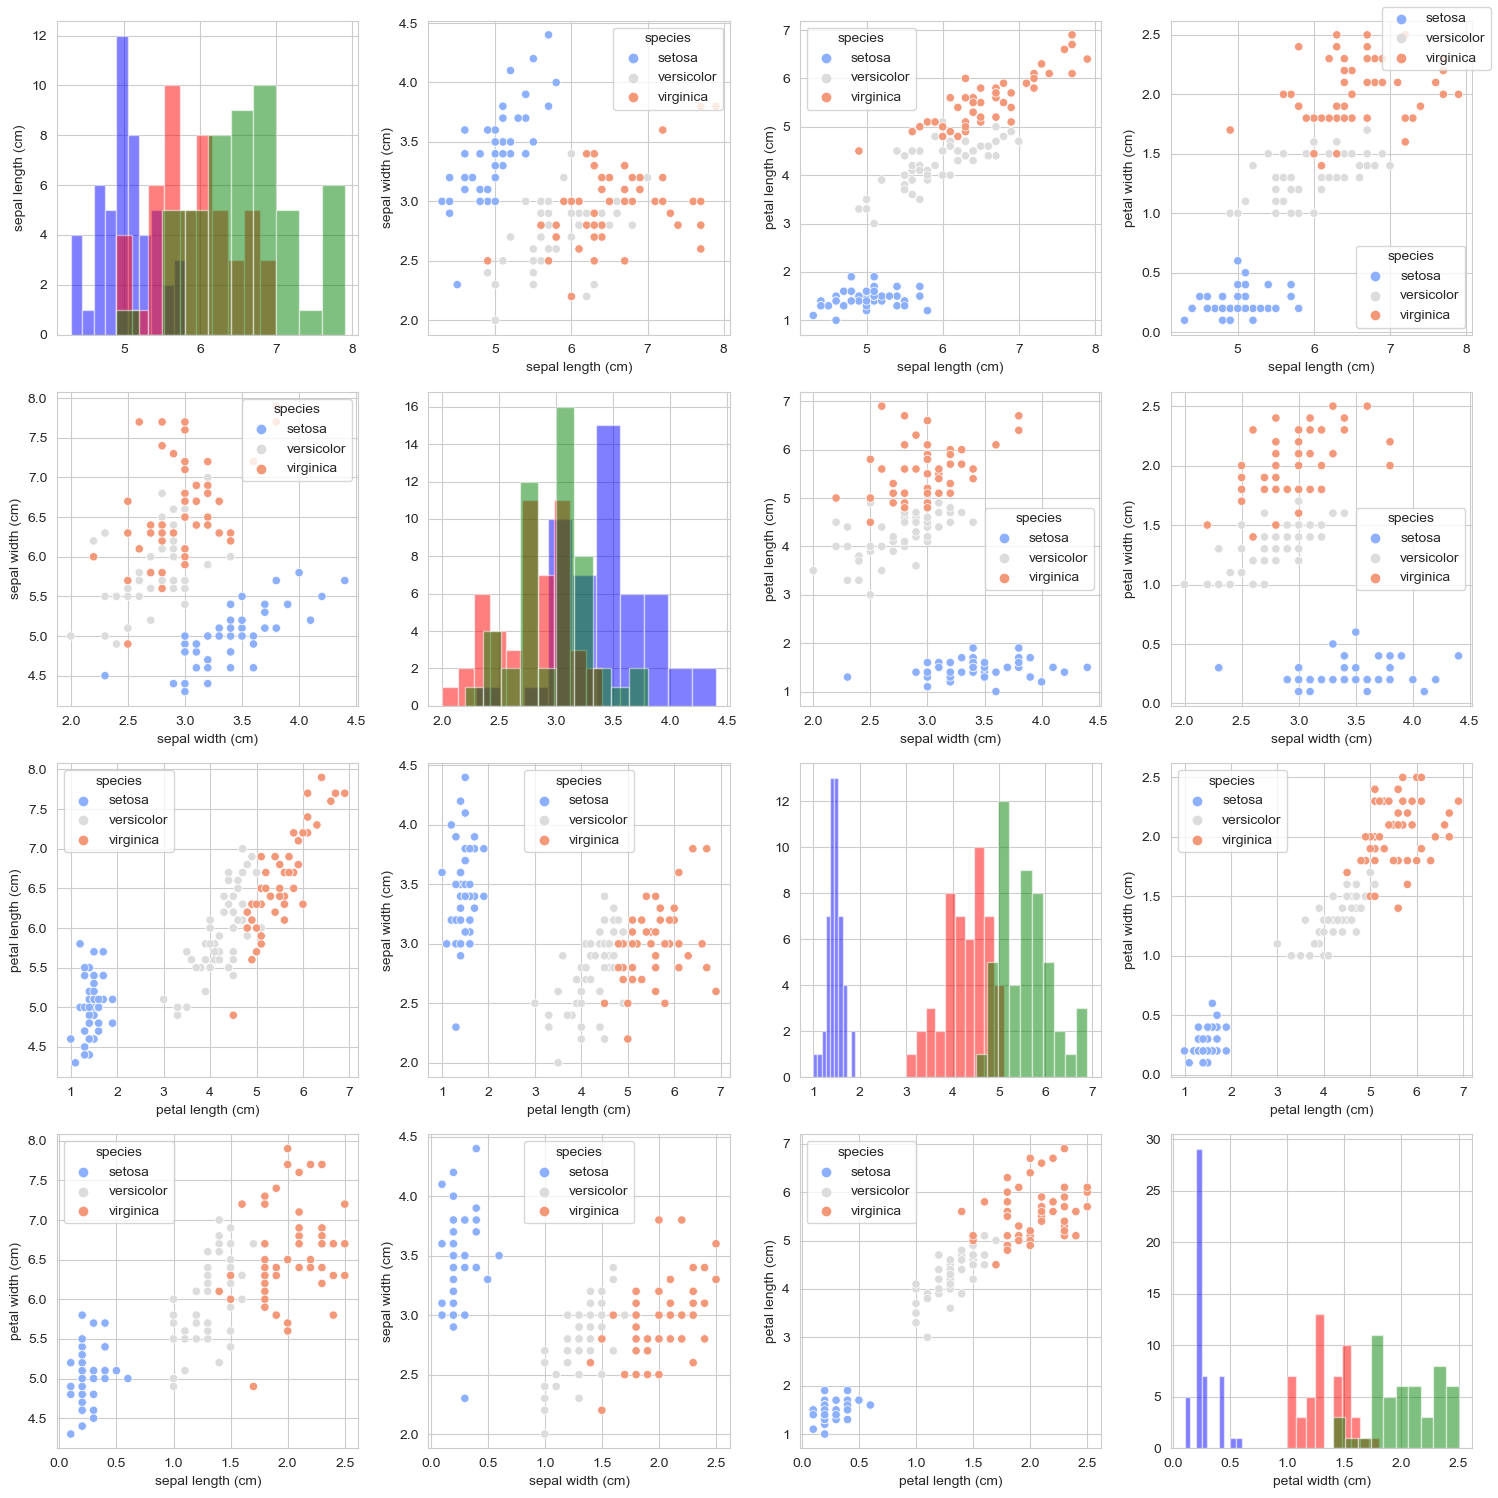

In [436]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

features = iris.feature_names

n_features = len(features)
fig, ax = plt.subplots(n_features, n_features, figsize=(15, 15))

# 모든 가능한 특성 조합에 대해 산점도 생성
for i in range(n_features):
    for j in range(n_features):
        if i == j:
            # 대각선에는 히스토그램
            ax[i, j].hist(df[features[i]][df['species'] == 'setosa'], color='blue', alpha=0.5, label='setosa')
            ax[i, j].hist(df[features[i]][df['species'] == 'versicolor'], color='red', alpha=0.5, label='versicolor')
            ax[i, j].hist(df[features[i]][df['species'] == 'virginica'], color='green', alpha=0.5, label='virginica')
        else:
            # 비대각선에는 산점도
            sns.scatterplot(x=df[features[i]], y=df[features[j]], hue=df['species'], palette='coolwarm', ax=ax[i, j])

        # 축 레이블 추가
        if j == 0:
            ax[i, j].set_ylabel(features[i])
        if i == n_features - 1:
            ax[i, j].set_xlabel(features[j])

plt.tight_layout()

handles, labels = ax[0, n_features-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


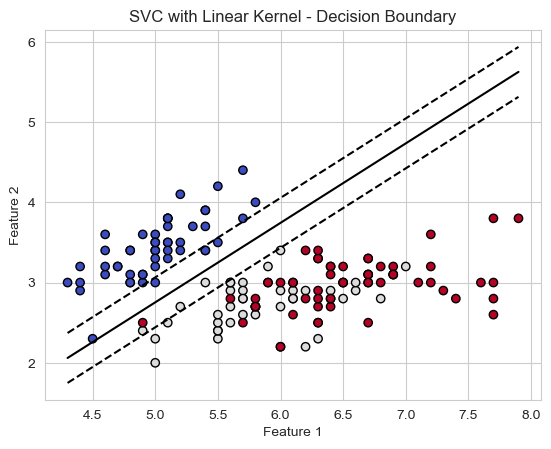

In [437]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 데이터 생성 (이 예제에서는 iris 데이터를 사용)
iris = datasets.load_iris()
X = iris.data[:, :2]  # 2개의 특성만 사용
y = iris.target

# SVC 모델 생성 (linear 커널 사용)
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC with Linear Kernel - Decision Boundary')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

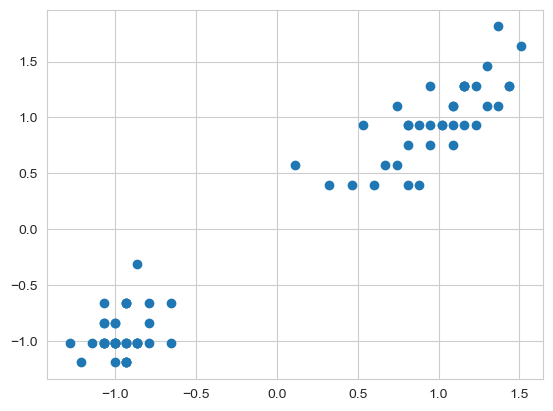

In [438]:
plt.scatter(scaled_X_train.T[0], scaled_X_train.T[1])
plt.scatter(scaled_X_train.T[1], scaled_X_train.T[2])

In [ ]:
plt.scatter(irisDF.iloc[:50,0],irisDF.iloc[:50,1])
plt.scatter(irisDF.iloc[51:100,0],irisDF.iloc[51:100,1])
plt.axline(3)

In [441]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


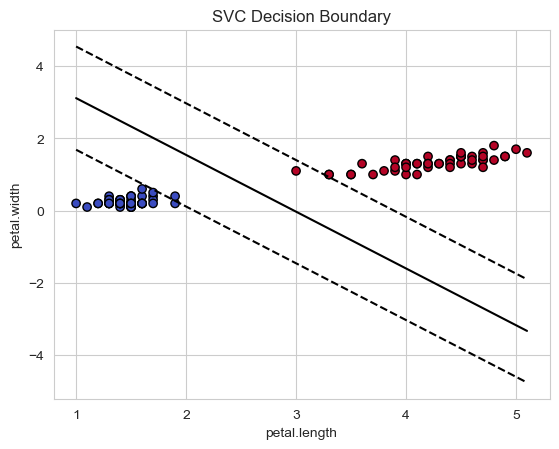

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC



X = np.array(featureDF)
y = targerSR.T.replace({"setosa":0, "versicolor":1})

# SVC 모델 생성
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--') # 점선
plt.plot(xx, yy_up, 'k--') # 점선 

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
# plt.ylim(-0.5,2)
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.title('SVC Decision Boundary')
plt.show()

In [ ]:
X

In [ ]:
targerSR.T.replace('setosa', 1)